## Import Module

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## IMDB dataset

In [ ]:
NUM_WORDS=10000 #자주 쓰인 상위 1000개의 단어
(train_x, train_y), (test_x, test_y) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [ ]:
INDEX_FROM=3
word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}
def decode(sequence):    
    print(' '.join(id_to_word[id] for id in sequence ))
    
decode(test_x[0])

1654784/1641221 [==============================] - 0s 0us/step
<START> please give this one a miss br br <UNK> <UNK> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you madison fans give this a miss


In [ ]:
train_x = keras.preprocessing.sequence.pad_sequences(train_x,value=0,padding='post',maxlen=256)
test_x = keras.preprocessing.sequence.pad_sequences(test_x,value=0,padding='post',maxlen=256)

In [ ]:
decode(test_x[100])

<START> a quick glance at the premise of this film would seem to indicate just another dumb <UNK> <UNK> <UNK> slash fest the type where sex equals death and the actors are all annoying stereotypes you actually want to die however delivers considerably more br br rather than focus on bare flesh and gore though there is a little of each no sex however the flick focuses on delivering impending dread <UNK> tension amidst a lovely <UNK> backdrop these feelings are further <UNK> by a cast of realistically likable characters and <UNK> that are more amoral than cardboard <UNK> of evil oh yeah george kennedy is here too and when is that not a good thing br br if you liked wrong turn then watch this to see where much of its' <UNK> came from <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <

In [ ]:
test_y[100]

1

In [ ]:
model = keras.Sequential([
    keras.layers.Embedding(input_dim=NUM_WORDS, output_dim=2, input_length=256),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
  
])

model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 256, 2)            20000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 2565      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 6         
Total params: 22,571
Trainable params: 22,571
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

history = model.fit(train_x,
                    train_y,
                    epochs=20,
                    batch_size=100,
                    validation_data=(test_x, test_y),
                    verbose=1,
                    callbacks=early_stop)

Epoch 1/20
250/250 [==============================] - 2s 6ms/step - loss: 0.6928 - accuracy: 0.5092 - binary_crossentropy: 0.6928 - val_loss: 0.6909 - val_accuracy: 0.5433 - val_binary_crossentropy: 0.6909
Epoch 2/20
250/250 [==============================] - 1s 6ms/step - loss: 0.5799 - accuracy: 0.7063 - binary_crossentropy: 0.5799 - val_loss: 0.4042 - val_accuracy: 0.8388 - val_binary_crossentropy: 0.4042
Epoch 3/20
250/250 [==============================] - 2s 7ms/step - loss: 0.3595 - accuracy: 0.8471 - binary_crossentropy: 0.3595 - val_loss: 0.3242 - val_accuracy: 0.8636 - val_binary_crossentropy: 0.3242
Epoch 4/20
250/250 [==============================] - 1s 6ms/step - loss: 0.3012 - accuracy: 0.8748 - binary_crossentropy: 0.3012 - val_loss: 0.2995 - val_accuracy: 0.8764 - val_binary_crossentropy: 0.2995
Epoch 5/20
250/250 [==============================] - 1s 6ms/step - loss: 0.2709 - accuracy: 0.8906 - binary_crossentropy: 0.2709 - val_loss: 0.3054 - val_accuracy: 0.8681 - va

## 임베딩 레이어 살펴보기

In [ ]:
# 임베딩 레이어만 추리기
embed=keras.backend.function(
    [model.layers[0].input],
    [model.layers[1].output]
)

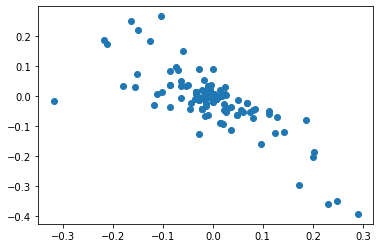

In [ ]:
# 2차원에 데이터 시각화 해보기
result=embed(test_x[100])[0]
plt.scatter(result[:,0],result[:,1])


In [ ]:
# 긍정, 부정 단어들을 추려내기
keywords = ['great', 'brilliant','crap','bad', 'fantastic', 'movie', 'seagal','suck','wonderful']
ids=[]
for word in keywords:
    ids.append(word_to_id[word])
ids=np.array(ids)
ids

array([  87,  530,  595,   78,  777,   20, 3272, 2777,  389])

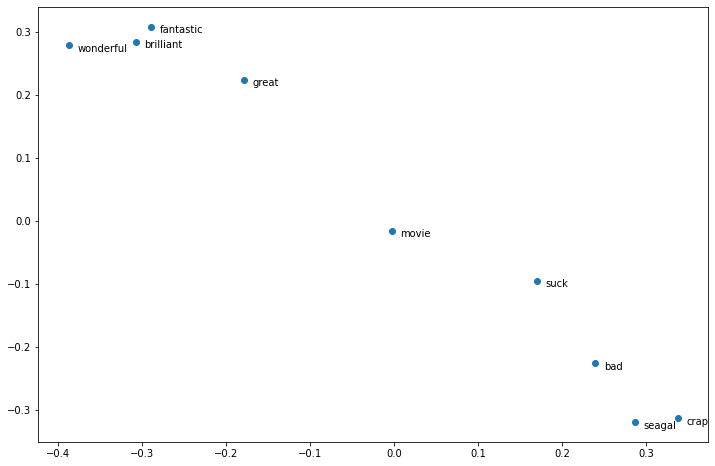

In [ ]:
# 긍정, 부정 단어들을 매핑해보기
result = embed(ids)[0]
plt.figure(figsize=(12,8))
plt.scatter(result[:,0],result[:,1])
for i,j in zip(keywords, result):
    plt.annotate(i, (j[0]+0.01,j[1]-0.01))

## Test RNN layers

In [ ]:
rnn=tf.keras.layers.SimpleRNN(1)

In [ ]:
x=np.random.rand(10,4)

In [ ]:
x=x.reshape(1,10,4)
x

array([[[0.89688803, 0.89131772, 0.10705722, 0.59229782],
        [0.20353401, 0.4632617 , 0.01362039, 0.52581225],
        [0.80125296, 0.43673976, 0.77064982, 0.87757446],
        [0.13474383, 0.8285217 , 0.5650052 , 0.49659167],
        [0.95287008, 0.19505824, 0.34472721, 0.80330485],
        [0.70640028, 0.64892766, 0.07509177, 0.61594853],
        [0.401523  , 0.90450108, 0.04424989, 0.93931159],
        [0.42278576, 0.70273697, 0.91862194, 0.58391115],
        [0.87739314, 0.17911417, 0.33979958, 0.78728389],
        [0.22070369, 0.61587449, 0.90882134, 0.9125869 ]]])

In [ ]:
x2=np.random.rand(1,20,4)
rnn(x2)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.94101554]], dtype=float32)>

In [ ]:
rnn=tf.keras.layers.SimpleRNN(1, return_sequences=True)
rnn(x)

<tf.Tensor: shape=(1, 10, 1), dtype=float32, numpy=
array([[[ 0.58326685],
        [-0.32400668],
        [ 0.7181682 ],
        [-0.05164018],
        [ 0.35033494],
        [ 0.11682774],
        [ 0.36808193],
        [ 0.3785091 ],
        [-0.08798663],
        [ 0.61032224]]], dtype=float32)>

## Test LSTM layers

In [ ]:
lstm = tf.keras.layers.LSTM(1)
lstm(x)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.35969055]], dtype=float32)>

In [ ]:
# http://intelligence.korea.ac.kr/members/wschoi/nlp/deeplearning/Bidirectional-RNN-and-LSTM/
model = keras.Sequential([
    keras.layers.Embedding(input_dim=NUM_WORDS, output_dim=32, input_length=256),
    keras.layers.Dropout(0.5),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),    
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),    
])

model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                      metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 256, 32)           320000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256, 32)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 370,705
Trainable params: 370,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history = model.fit(train_x,
                    train_y,
                    epochs=20,
                    batch_size=100,                    
                    validation_data=(test_x,test_y),
                    callbacks=early_stop)

Epoch 1/20
250/250 [==============================] - 126s 491ms/step - loss: 0.5018 - accuracy: 0.7456 - val_loss: 0.4225 - val_accuracy: 0.8239
Epoch 2/20
250/250 [==============================] - 123s 492ms/step - loss: 0.2820 - accuracy: 0.8906 - val_loss: 0.3497 - val_accuracy: 0.8650
Epoch 3/20
250/250 [==============================] - 122s 490ms/step - loss: 0.2194 - accuracy: 0.9183 - val_loss: 0.3091 - val_accuracy: 0.8727
Epoch 4/20
250/250 [==============================] - 122s 488ms/step - loss: 0.1848 - accuracy: 0.9323 - val_loss: 0.3360 - val_accuracy: 0.8732
Epoch 5/20
250/250 [==============================] - 122s 488ms/step - loss: 0.1740 - accuracy: 0.9365 - val_loss: 0.3913 - val_accuracy: 0.8707
Epoch 6/20
250/250 [==============================] - 122s 489ms/step - loss: 0.1389 - accuracy: 0.9512 - val_loss: 0.3866 - val_accuracy: 0.8634
Epoch 7/20
250/250 [==============================] - 123s 492ms/step - loss: 0.1327 - accuracy: 0.9540 - val_loss: 0.4631 -